# Лабораторная работа №1: Предобработка данных

Выполнил: Колованов Родион Алексеевич, группа 9381.

## Цель

Ознакомиться с методами предобработки данных из библиотеки Scikit Learn.

## Ход работы

Для начала подключим необходимые библиотеки:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing

### Загрузка данных

Загрузим датасет `heart_failure_clinical_records_dataset.csv` в датафрейм, исключим из него бинарные признаки `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking`, `DEATH_EVENT`, а также признак времени `time`, и отобразим его:

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = df.drop(columns=["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "time", "DEATH_EVENT"])

display(df)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


Построим гистограммы признаков:

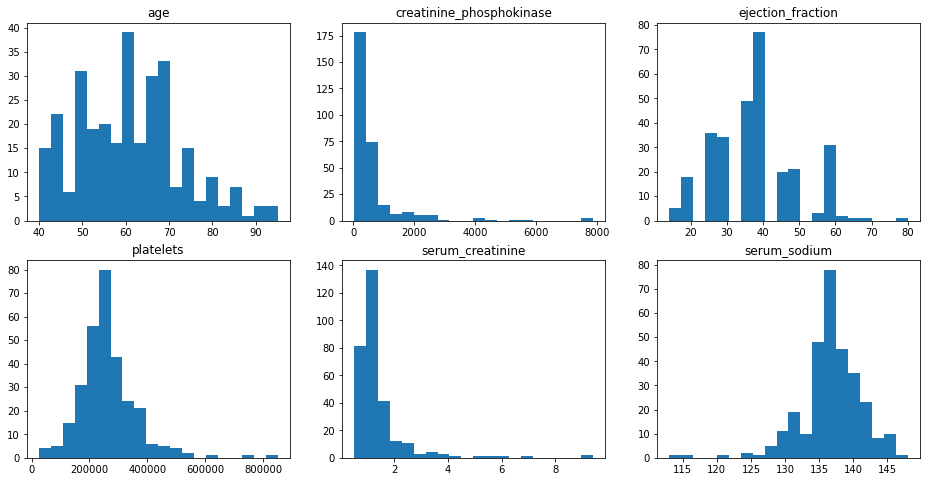

In [4]:
bins_number = 20
figure, axes = plt.subplots(2, 3, figsize=(16, 8))
hists = [None, None, None, None, None, None]

hists[0] = axes[0, 0].hist(df["age"].values, bins=bins_number)
axes[0, 0].set_title("age")
hists[1] = axes[0, 1].hist(df["creatinine_phosphokinase"].values, bins=bins_number)
axes[0, 1].set_title("creatinine_phosphokinase")
hists[2] = axes[0, 2].hist(df["ejection_fraction"].values, bins=bins_number)
axes[0, 2].set_title("ejection_fraction")
hists[3] = axes[1, 0].hist(df["platelets"].values, bins=bins_number)
axes[1, 0].set_title("platelets")
hists[4] = axes[1, 1].hist(df["serum_creatinine"].values, bins=bins_number)
axes[1, 1].set_title("serum_creatinine")
hists[5] = axes[1, 2].hist(df["serum_sodium"].values, bins=bins_number)
axes[1, 2].set_title("serum_sodium")

plt.show()

Определим диапазоны значений для каждого из признаков, а также возле какого значения лежит наибольшее количество наблюдений:

In [5]:
for i in range(len(df.columns)):
    column_name = df.columns[i]
    min_value = hists[i][1][0]
    max_value = hists[i][1][-1]
    mode_index = hists[i][0].argmax()
    mode_left_bound = round(hists[i][1][mode_index], 5)
    mode_right_bound = round(hists[i][1][mode_index + 1], 5)

    print("""Признак '{}':
    Диапазон значений: [{}, {}]. 
    Наибольшее кол-во наблюдений в диапазоне: [{}, {}]\n"""
          .format(column_name, min_value, max_value, mode_left_bound, mode_right_bound))

Признак 'age':
    Диапазон значений: [40.0, 95.0]. 
    Наибольшее кол-во наблюдений в диапазоне: [59.25, 62.0]

Признак 'creatinine_phosphokinase':
    Диапазон значений: [23.0, 7861.0]. 
    Наибольшее кол-во наблюдений в диапазоне: [23.0, 414.9]

Признак 'ejection_fraction':
    Диапазон значений: [14.0, 80.0]. 
    Наибольшее кол-во наблюдений в диапазоне: [37.1, 40.4]

Признак 'platelets':
    Диапазон значений: [25100.0, 850000.0]. 
    Наибольшее кол-во наблюдений в диапазоне: [231325.0, 272570.0]

Признак 'serum_creatinine':
    Диапазон значений: [0.5, 9.4]. 
    Наибольшее кол-во наблюдений в диапазоне: [0.945, 1.39]

Признак 'serum_sodium':
    Диапазон значений: [113.0, 148.0]. 
    Наибольшее кол-во наблюдений в диапазоне: [135.75, 137.5]



Далее работа с датафреймом будет осуществляться с использованием библиотеки `sklearn`. Поскольку данная библиотека работает с массивами `numpy`, необходимо преобразовать датафрейм к двумерному массиву `numpy`:

In [6]:
data = df.to_numpy(dtype="float")

display(data)

array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02],
       ...,
       [4.5000000e+01, 2.0600000e+03, 6.0000000e+01, 7.4200000e+05,
        8.0000000e-01, 1.3800000e+02],
       [4.5000000e+01, 2.4130000e+03, 3.8000000e+01, 1.4000000e+05,
        1.4000000e+00, 1.4000000e+02],
       [5.0000000e+01, 1.9600000e+02, 4.5000000e+01, 3.9500000e+05,
        1.6000000e+00, 1.3600000e+02]])

Здесь строка соответствует наблюдению, а столбец - признаку.

### Стандартизация данных

Настроим стандартизацию на основе первых 150 наблюдений используя `StandartScaler` и выполним стандартизацию данных:

In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(data[:150,:])
scaled_data = scaler.transform(data)

display(scaled_data)

array([[ 9.68155915e-01, -2.11418177e-02, -1.37635007e+00,
        -1.81590286e-02,  3.25269804e-01, -1.42156934e+00],
       [-6.38297484e-01,  6.09698531e+00,  4.09019337e-03,
        -3.52287805e-02, -3.60591670e-01, -9.98623091e-02],
       [ 1.64929216e-01, -3.87607463e-01, -1.37635007e+00,
        -1.08893648e+00, -1.89126302e-01, -1.64185385e+00],
       ...,
       [-1.44152418e+00,  1.22114310e+00,  1.69129496e+00,
         4.94068412e+00, -6.17789723e-01,  3.40706702e-01],
       [-1.44152418e+00,  1.51784579e+00,  4.09019337e-03,
        -1.31764623e+00, -1.03393617e-01,  7.81275713e-01],
       [-1.03991083e+00, -3.45581586e-01,  5.40928073e-01,
         1.33330766e+00,  6.80717513e-02, -9.98623091e-02]])

Построим гистограммы стандартизированных данных:

In [8]:
def show_hist(data):
    figure, axes = plt.subplots(2, 3, figsize=(16, 8))

    axes[0, 0].hist(data[:,0], bins=bins_number)
    axes[0, 0].set_title("age")
    axes[0, 1].hist(data[:,1], bins=bins_number)
    axes[0, 1].set_title("creatinine_phosphokinase")
    axes[0, 2].hist(data[:,2], bins=bins_number)
    axes[0, 2].set_title("ejection_fraction")
    axes[1, 0].hist(data[:,3], bins=bins_number)
    axes[1, 0].set_title("platelets")
    axes[1, 1].hist(data[:,4], bins=bins_number)
    axes[1, 1].set_title("serum_creatinine")
    axes[1, 2].hist(data[:,5], bins=bins_number)
    axes[1, 2].set_title("serum_sodium")

    plt.show()

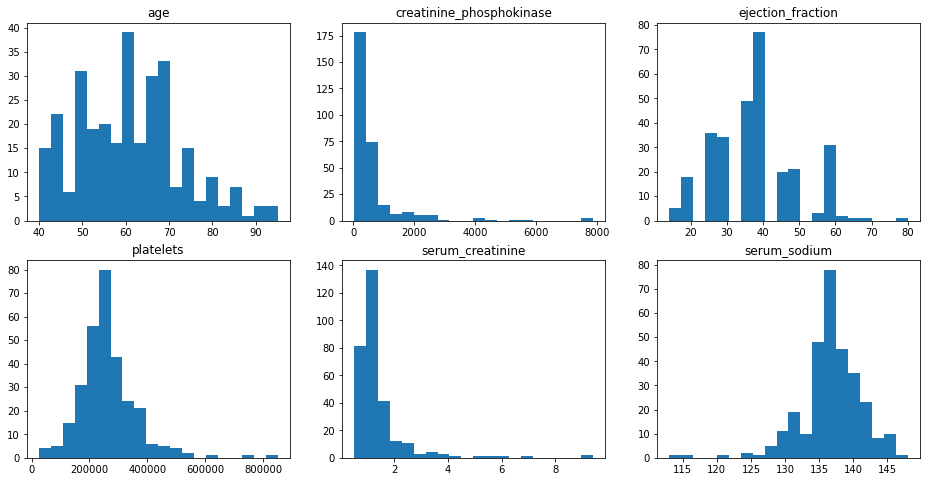

In [9]:
show_hist(data)

Сравнивая полученные гистограммы для исходных данных и для стандартизированных данных, можно заметить, что стобцы с наибольшим количеством наблюдений приблизились к 0, а диапазоны значений признаков стали схожи между собой. При стандартизации все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, приводятся к набору значений из распределения с нулевым средним и СКО, равным 1.

$$ value_{std} = \frac{value - mean(values)}{var(values)} $$

Это объясняет, почему стобцы с наибольшим количеством наблюдений сдвинулись к 0, а диапазон значений признаков трансформировался - чтобы приблизить мат. ожидание выборки признаков к 0, а СКО - к 1.

Для проверки рассчитаем мат. ожидание и СКО до и после стандартизации:

In [10]:
for i in range(len(df.columns)):
    column_name = df.columns[i]
    print("""[ Признак '{}']
До стандартизации: МО = {}, СКО = {}, Д = {}
После стандартизации: МО = {}, СКО = {}, Д = {} 
""".format(column_name,
           np.mean(data[:150,i]), np.std(data[:150,i]), np.var(data[:150,i]),
           np.mean(scaled_data[:,i]), np.std(scaled_data[:,i]), np.var(scaled_data[:,i])))

[ Признак 'age']
До стандартизации: МО = 62.946666666666665, СКО = 12.449785361826748, Д = 154.99715555555557
После стандартизации: МО = -0.16970362369106984, СКО = 0.9538237876978354, Д = 0.9097798179782453 

[ Признак 'creatinine_phosphokinase']
До стандартизации: МО = 607.1533333333333, СКО = 1189.7431752926996, Д = 1415488.8231555554
После стандартизации: МО = -0.021276750290383013, СКО = 0.8141790488228113, Д = 0.6628875235420177 

[ Признак 'ejection_fraction']
До стандартизации: МО = 37.946666666666665, СКО = 13.039318318923817, Д = 170.02382222222224
После стандартизации: МО = 0.01050249484809085, СКО = 0.9061082161919123, Д = 0.8210320994504893 

[ Признак 'platelets']
До стандартизации: МО = 266746.74946666666, СКО = 96191.79018543586, Д = 9252860499.078917
После стандартизации: МО = -0.035228788194085287, СКО = 1.0150611342848024, Д = 1.0303491063355494 

[ Признак 'serum_creatinine']
До стандартизации: МО = 1.5206000000000002, СКО = 1.1664162950393542, Д = 1.360526973333333

Для каждого признака выведем формулы, по которым происходила стандартизация данных.

Для признака `age`:
$$ value_{std} = \frac{value - 62.946666666666665}{154.99715555555557} $$

Для признака `creatinine_phosphokinase`:
$$ value_{std} = \frac{value - 607.1533333333333}{1415488.8231555554} $$

Для признака `ejection_fraction`:
$$ value_{std} = \frac{value - 37.946666666666665}{170.02382222222224} $$

Для признака `platelets`:
$$ value_{std} = \frac{value - 266746.74946666666}{9252860499.078917} $$

Для признака `serum_creatinine`:
$$ value_{std} = \frac{value - 1.5206000000000002}{1.3605269733333336} $$

Для признака `serum_sodium`:
$$ value_{std} = \frac{value - 136.45333333333335}{20.607822222222225} $$

Сравним значения из формул с полями `mean_` и `var_` объекта `scaler`:

In [11]:
display(scaler.mean_, scaler.var_)

array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
       1.52060000e+00, 1.36453333e+02])

array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
       1.36052697e+00, 2.06078222e+01])

Как видно, в первом массиве содержатся мат. ожидания для каждого из признаков, а во втором - дисперсии для каждого из признаков. Эти значения совпадают со значениями из формул, которые были выведены выше.

Проведем настройку стандартизации на всех данных и сравним с результатами настройки на основании 150 наблюдений:

In [12]:
scaler_all = preprocessing.StandardScaler().fit(data)
scaler_150 = preprocessing.StandardScaler().fit(data[:150,:])

print("""Настройка стандартизации для всех данных:
    МО: {},
    СКО: {},
    Д: {}

Настройка стандартизации для первых 150 наблюдений:
    МО: {},
    СКО: {},
    Д: {}""".format(scaler_all.mean_, scaler_all.scale_, scaler_all.var_,
                    scaler_150.mean_, scaler_150.scale_, scaler_150.var_))

Настройка стандартизации для всех данных:
    МО: [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02],
    СКО: [1.18749014e+01 9.68663967e+02 1.18150335e+01 9.76405477e+04
 1.03277867e+00 4.40509238e+00],
    Д: [1.41013284e+02 9.38309881e+05 1.39595016e+02 9.53367655e+09
 1.06663177e+00 1.94048389e+01]

Настройка стандартизации для первых 150 наблюдений:
    МО: [6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02],
    СКО: [1.24497854e+01 1.18974318e+03 1.30393183e+01 9.61917902e+04
 1.16641630e+00 4.53958393e+00],
    Д: [1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


Как видно, настройка по 150 наблюдениям сильно похожа на настройку по всем наблюдениям.

### Приведение к диапазону

Приведем данные к диапазону, используя `MinMaxScaler`:

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(data)
min_max_scaled_data = min_max_scaler.transform(data)

display(min_max_scaled_data)

array([[0.63636364, 0.07131921, 0.09090909, 0.29082313, 0.15730337,
        0.48571429],
       [0.27272727, 1.        , 0.36363636, 0.28883262, 0.06741573,
        0.65714286],
       [0.45454545, 0.01569278, 0.09090909, 0.16595951, 0.08988764,
        0.45714286],
       ...,
       [0.09090909, 0.25988773, 0.6969697 , 0.86907504, 0.03370787,
        0.71428571],
       [0.09090909, 0.30492473, 0.36363636, 0.13928961, 0.1011236 ,
        0.77142857],
       [0.18181818, 0.02207196, 0.46969697, 0.44841799, 0.12359551,
        0.65714286]])

Построим гистограммы для признаков и сравним их с гистограммами исходных данных:

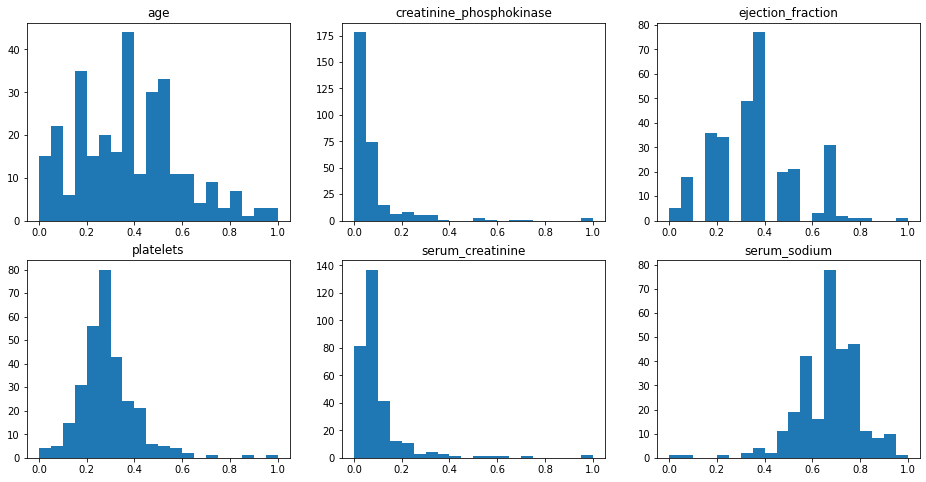

In [14]:
show_hist(min_max_scaled_data)

Сравнивая полученные гистограммы с гистограммами исходных данных, можно заметить, что гистограммы почти не изменились по рисунку, но изменилтсь по диапазону значений - теперь для всех признаков он равен $[0.0, 1.0]$. Отсюда понятно, что данные маштабируются из исходного диапазона значений в диапазон от 0 до 1.

Через параметры `MinMaxScaler` определим минимальное и максимальное значение данных для каждого признака:


In [15]:
for i in range(len(df.columns)):
    column_name = df.columns[i]
    print("Для признака '{}': min = {}, max = {}".format(column_name, min_max_scaler.data_min_[i], min_max_scaler.data_max_[i]))

Для признака 'age': min = 40.0, max = 95.0
Для признака 'creatinine_phosphokinase': min = 23.0, max = 7861.0
Для признака 'ejection_fraction': min = 14.0, max = 80.0
Для признака 'platelets': min = 25100.0, max = 850000.0
Для признака 'serum_creatinine': min = 0.5, max = 9.4
Для признака 'serum_sodium': min = 113.0, max = 148.0


Аналогично странсформируем данные, используя `MaxAbsScaler` и `RobustScaler`, построим для них гистограммы и определим, к какому диапазону приводятся данные.

In [16]:
max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_scaler.fit(data)
max_abs_scaled_data = max_abs_scaler.transform(data)

display(max_abs_scaled_data)

array([[0.78947368, 0.07403638, 0.25      , 0.31176471, 0.20212766,
        0.87837838],
       [0.57894737, 1.        , 0.475     , 0.30983298, 0.11702128,
        0.91891892],
       [0.68421053, 0.0185727 , 0.25      , 0.19058824, 0.13829787,
        0.87162162],
       ...,
       [0.47368421, 0.26205317, 0.75      , 0.87294118, 0.08510638,
        0.93243243],
       [0.47368421, 0.3069584 , 0.475     , 0.16470588, 0.14893617,
        0.94594595],
       [0.52631579, 0.02493321, 0.5625    , 0.46470588, 0.17021277,
        0.91891892]])

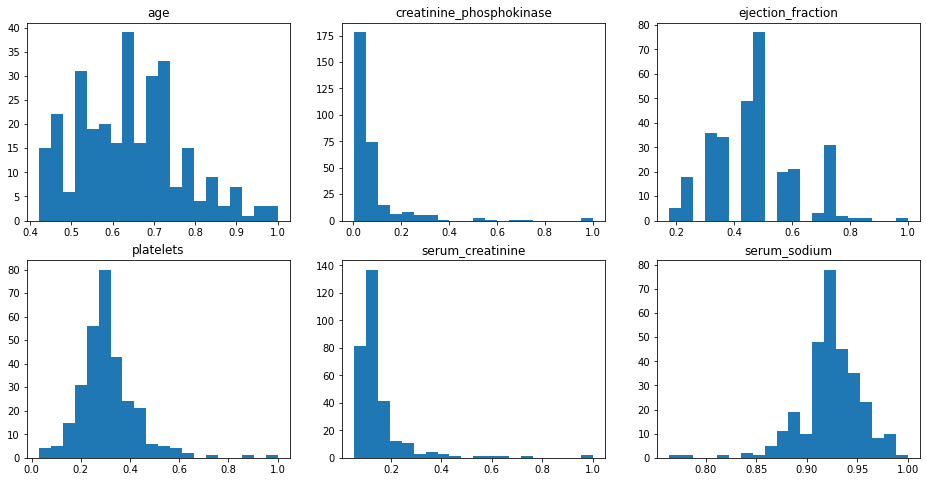

In [17]:
show_hist(max_abs_scaled_data)

Для `MaxAbsScaler` данные приводятся к диапазону $[\frac{min(values)}{abs(max(values))}, 1]$.

In [18]:
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit(data)
robust_scaled_data = robust_scaler.transform(data)

display(robust_scaled_data)

array([[ 7.89473684e-01,  7.13211600e-01, -1.20000000e+00,
         3.29670330e-02,  1.60000000e+00, -1.16666667e+00],
       [-2.63157895e-01,  1.63501611e+01,  0.00000000e+00,
         1.49234066e-02,  0.00000000e+00, -1.66666667e-01],
       [ 2.63157895e-01, -2.23415682e-01, -1.20000000e+00,
        -1.09890110e+00,  4.00000000e-01, -1.33333333e+00],
       ...,
       [-7.89473684e-01,  3.88829216e+00,  1.46666667e+00,
         5.27472527e+00, -6.00000000e-01,  1.66666667e-01],
       [-7.89473684e-01,  4.64661654e+00,  0.00000000e+00,
        -1.34065934e+00,  6.00000000e-01,  5.00000000e-01],
       [-5.26315789e-01, -1.16004296e-01,  4.66666667e-01,
         1.46153846e+00,  1.00000000e+00, -1.66666667e-01]])

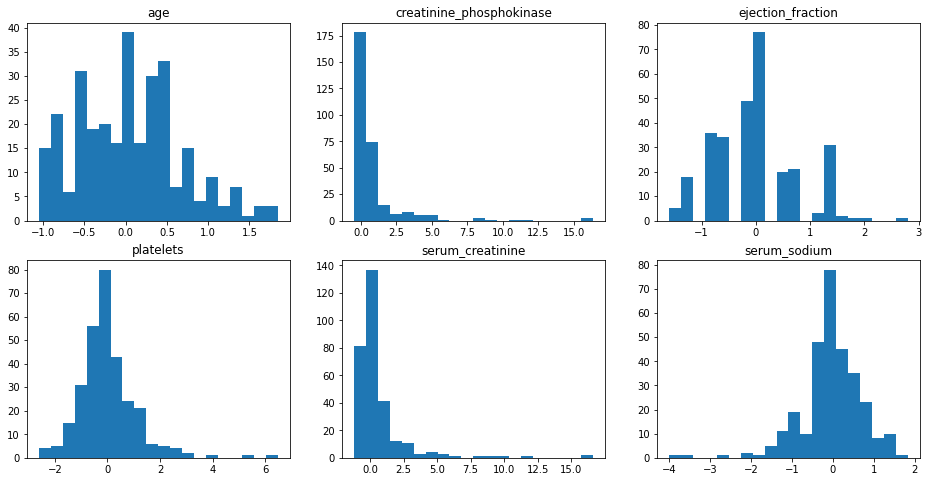

In [19]:
show_hist(robust_scaled_data)

Для `RobustScaler` данные приводятся к диапазону $[\frac{min(values) - median(values)}{IQR_{values}},\frac{max(values) - median(values)}{IQR_{values}}]$.

Напишем функцию, которая приводит все данные к диапазону $[-5, 10]$:

In [20]:
def transform(X, lower_bound=-5, upper_bound=10):
    X_min = np.amin(X, 0)
    X_max = np.amax(X, 0)
    return (X - X_min) * (upper_bound - lower_bound) / (X_max - X_min) + lower_bound

Для демонстрации преобразуем исходные данные к этому диапазону и построим гимстограммы:

In [21]:
transformed_data = transform(data)

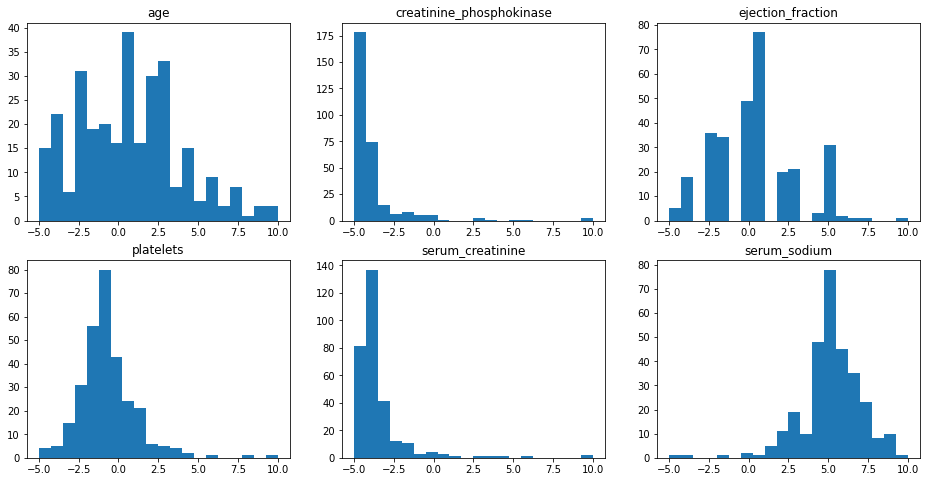

In [22]:
show_hist(transformed_data)

### Нелинейные преобразования

Приведем данные к равномерному распределению, используя `QuantileTransformer`:

In [23]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0)
quantile_transformer.fit(data)
quantile_scaled_data = quantile_transformer.transform(data)

Для преобразованных данных построим гистрограммы по каждому признаку и сравним их с исходными гистограммами:

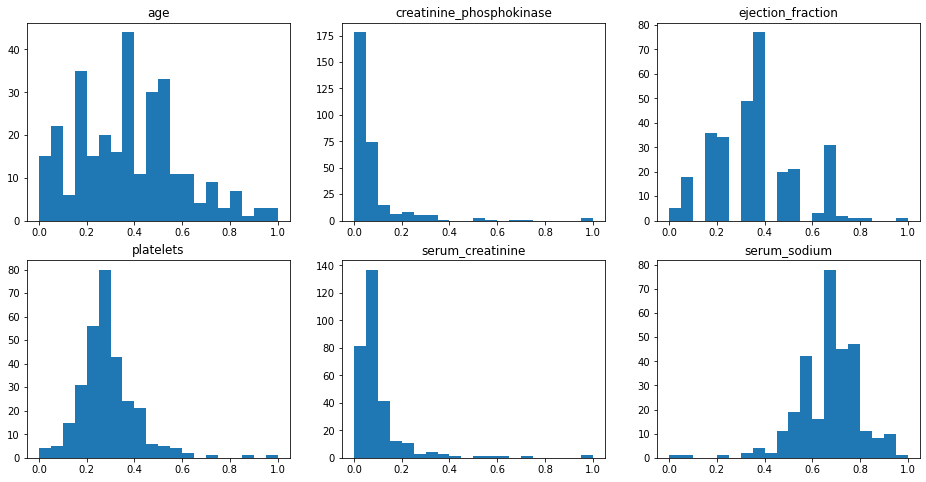

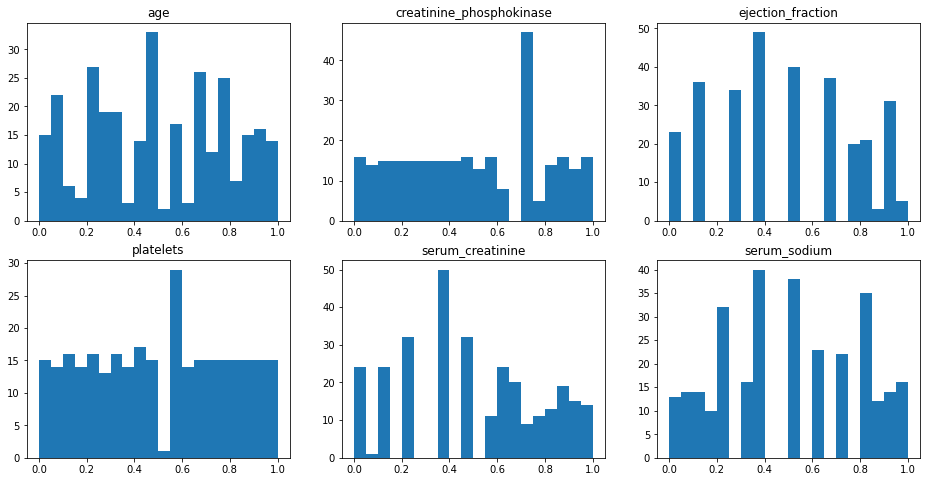

In [24]:
show_hist(min_max_scaled_data)
show_hist(quantile_scaled_data)

По сравнению с исходными гистограммами, полученные гистограммы схожи с гистограммами выборок из равномерных распределений. Видно, что данные распределились по всему диапазону значений более-менее равномерно, в отличии от исходных данных.

Определим, как и на что влияет значение параметра `n_quantiles`:

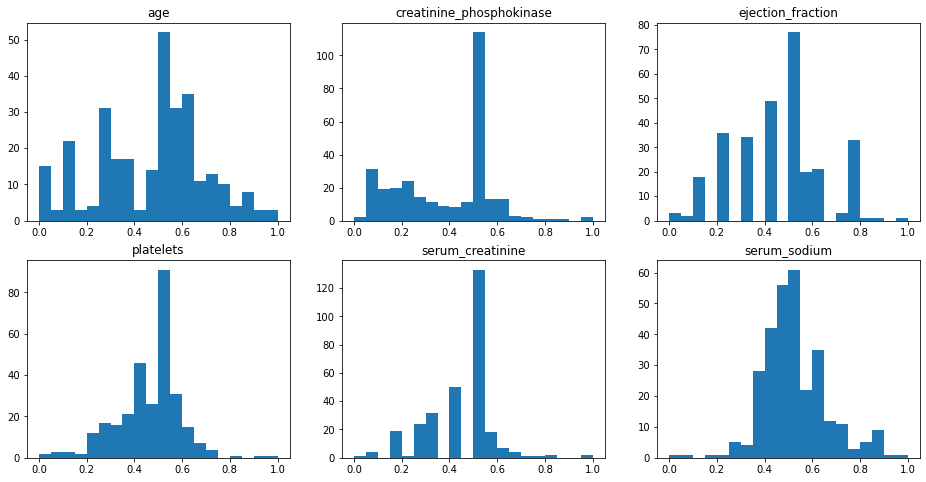

In [191]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=3, random_state=0)
quantile_transformer.fit(data)
quantile_scaled_data = quantile_transformer.transform(data)

show_hist(quantile_scaled_data)

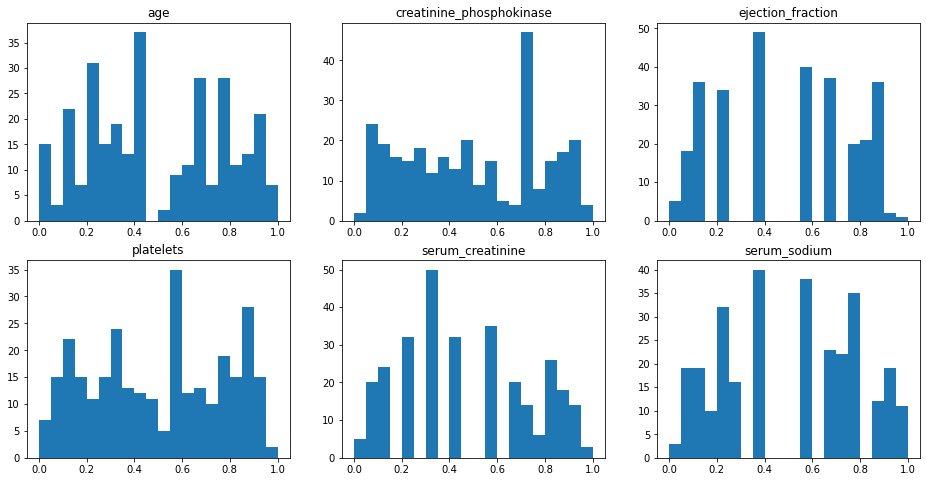

In [192]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)
quantile_transformer.fit(data)
quantile_scaled_data = quantile_transformer.transform(data)

show_hist(quantile_scaled_data)

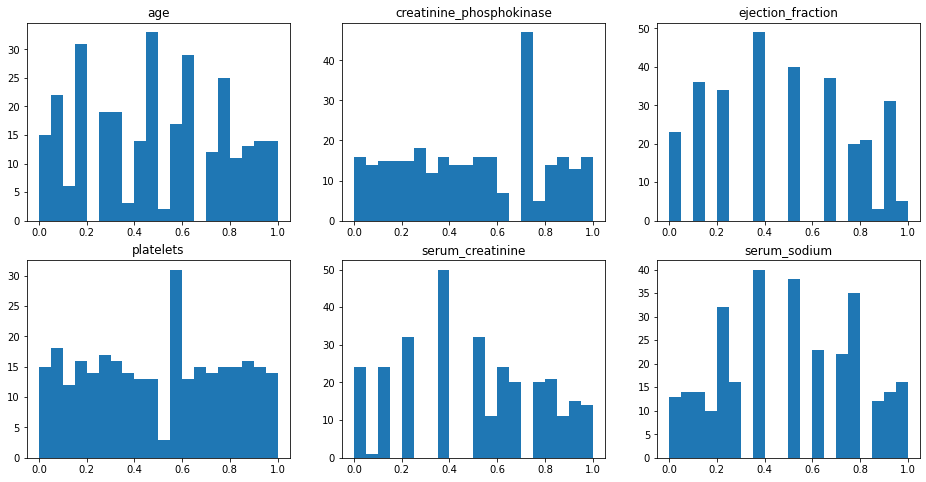

In [193]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=25, random_state=0)
quantile_transformer.fit(data)
quantile_scaled_data = quantile_transformer.transform(data)

show_hist(quantile_scaled_data)

Видно, что параметр `n_quantiles` влияет на равномерность распределения данных. Чем больше `n_quantiles`, тем более равномерно распределяются данные. Параметр отвечает за количество ориентиров, используемых для дискретизации кумулятивной функции распределения.

Приведем данные к нормальному распределению, используя `QuantileTransformer`:

In [194]:
normal_quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0, output_distribution="normal")
normal_quantile_transformer.fit(data)
normal_quantile_scaled_data = normal_quantile_transformer.transform(data)

Для преобразованных данных построим гистрограммы по каждому признаку и сравним их с исходными гистограммами:

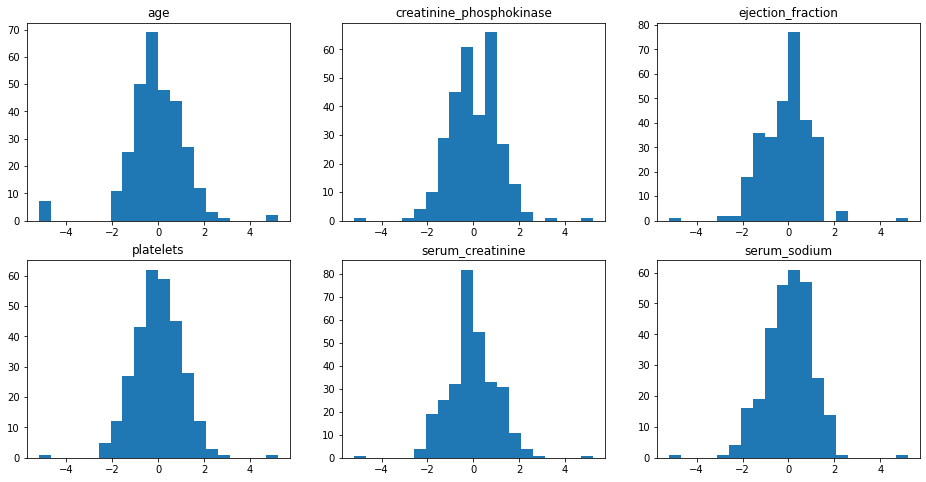

In [195]:
show_hist(normal_quantile_scaled_data)

По сравнению с исходными гистограммами, полученные гистограммы схожи с гистограммами выборок из нормальных распределений. Видно, что данные распределились схоже с нормальным законом распределения около значения 0, в отличии от исходных данных.

Приведем данные к нормальному распределению, используя `PowerTransformer`:


In [199]:
power_transformer = preprocessing.PowerTransformer()
power_transformer.fit(data)
power_scaled_data = power_transformer.transform(data)

Построим гистограммы для преобразованных данных:

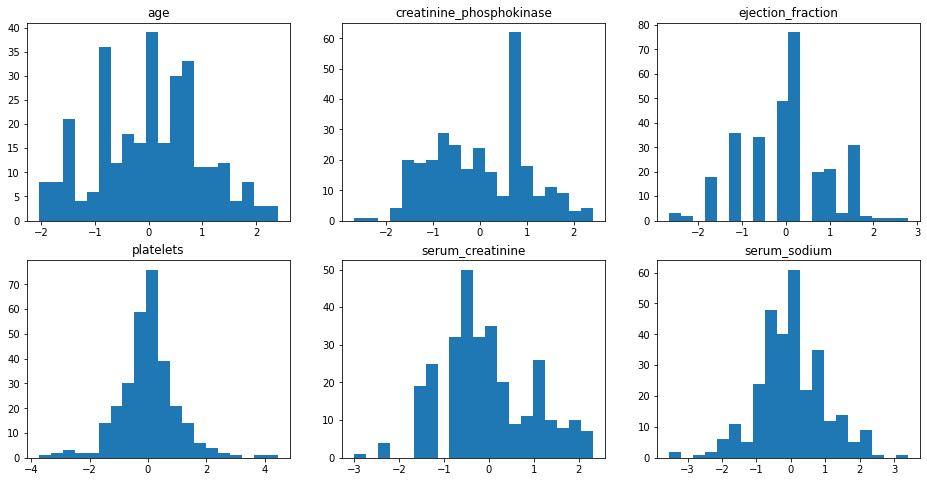

In [205]:
show_hist(power_scaled_data)

### Дискретизация признаков

Проведем дискретизацию признаков, используя `KBinsDiscretizer`, на следующее количество диапазонов:
- "age": 3,
- "creatinine_phosphokinase": 4
- "ejection_fraction": 3
- "platelets": 10
- "serum_creatinine": 2
- "serum_sodium": 4

In [224]:
k_bins_discretizer = preprocessing.KBinsDiscretizer(n_bins=(3, 4, 3, 10, 2, 4), encode="ordinal", strategy="uniform")
discretized_data = k_bins_discretizer.fit_transform(data)

Построим гистограммы и объясним полученные результаты:

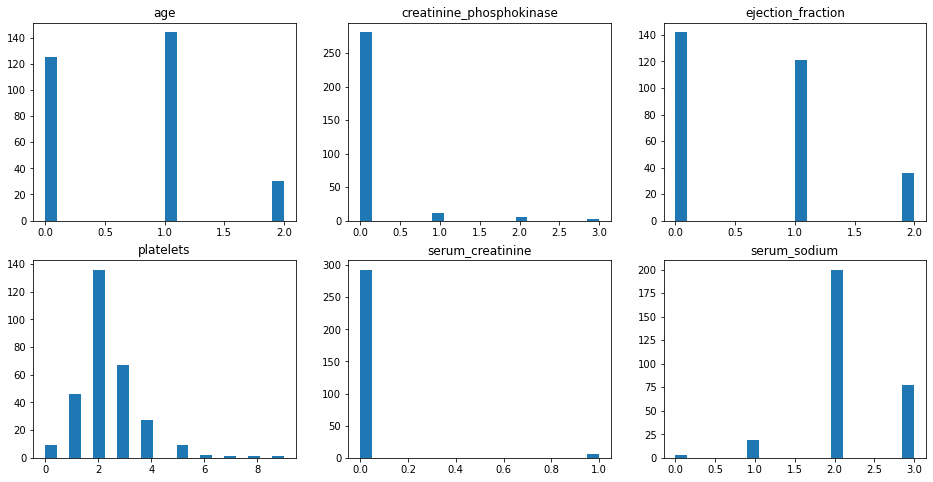

In [226]:
show_hist(discretized_data)

Поскольку выбранный формат кодирования равен `ordinal`, преобразованные данные представлены в виде массива того же размера, что и массив исходных данных, где исходные значения заменены на индексы дискретных значений, которым были сопоставлены исходные значения. Поскольку выбрана статегия `uniform`, диапазон исходных значений делится на равные интервалы, и значения, расположенные в одном и том же промежутке, сопоставляются одному и тому же дискретному значению.

Через параметр `bin_edges_` выведем диапазоны каждого интервала для каждого признака:

In [235]:
for i in range(len(df.columns)):
    column_name = df.columns[i]
    intervals = list(k_bins_discretizer.bin_edges_[i])
    
    print("Для признака '{}':".format(column_name))
    for i in range(len(intervals) - 1):
        print("    [{}, {}], ".format(round(intervals[i], 3), round(intervals[i + 1], 3)))

Для признака 'age':
    [40.0, 58.333], 
    [58.333, 76.667], 
    [76.667, 95.0], 
Для признака 'creatinine_phosphokinase':
    [23.0, 1982.5], 
    [1982.5, 3942.0], 
    [3942.0, 5901.5], 
    [5901.5, 7861.0], 
Для признака 'ejection_fraction':
    [14.0, 36.0], 
    [36.0, 58.0], 
    [58.0, 80.0], 
Для признака 'platelets':
    [25100.0, 107590.0], 
    [107590.0, 190080.0], 
    [190080.0, 272570.0], 
    [272570.0, 355060.0], 
    [355060.0, 437550.0], 
    [437550.0, 520040.0], 
    [520040.0, 602530.0], 
    [602530.0, 685020.0], 
    [685020.0, 767510.0], 
    [767510.0, 850000.0], 
Для признака 'serum_creatinine':
    [0.5, 4.95], 
    [4.95, 9.4], 
Для признака 'serum_sodium':
    [113.0, 121.75], 
    [121.75, 130.5], 
    [130.5, 139.25], 
    [139.25, 148.0], 


## Вывод

В ходе выполнения лабораторной работы были рассмотрены методы предобработки данных из библиотеки `Scikit Learn`.

Были рассмотрены:
- Методы стандартизации данных;
- Методы приведения данных к диапазону;
- Методы нелинейного преобразования данных;
- Методы дискретизации признаков.